<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyxirr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.8/546.8 kB 6.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2025-04-22 14:48:28
-------------------
qualified stocks: 91
with latest results: 85
still star stocks: 47
-------------------
Initial Investment:  1.09 C
CY Investment:  1.36 C
Reserve:  3.00 K
Current:  1.19 C
-------------------
Today PnL: 91.07 K (0.77%)
Current PnL: -17.28 L (-12.71%)
CY Booked + Current PnL: -16.99 L (-12.49%)
-------------------
Total profit:  5.52 L
Total loss:  -22.80 L
-------------------
Total Booked + Current PnL: 9.99 L (9.16%)
Total Booked PnL: 27.27 L (25.01%)
Curr Year Booked PnL: 28.87 K (0.24%)
Prev Year Booked PnL: 26.98 L (24.74%)
Est FTT:  1.94 C
Est FTT PnL: 75.13 L (63.23%)
-------------------
Est LTT:  2.54 C
Est LTT PnL: 1.35 C (113.86%)
Deployed:  1.09 C
Current:  1.19 C
CAGR/XIRR %: 6.17%


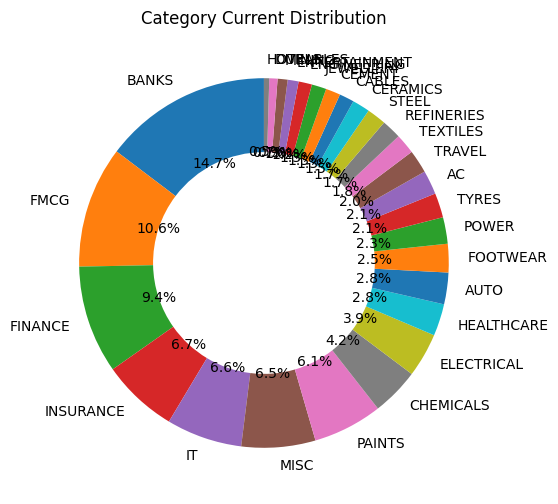

In [4]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'CapType', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [5]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
70,SBIN,760.30,863.00,-15.99,M-LC,59.34,218135.0,16656.0,10558.0,0.79,...,4.84,13.51,93.0,1.58,1.84,19.50,XY25,NTT,LC,BANKS
11,AXISBANK,1003.18,1317.30,-11.92,H-LC,83.52,148437.0,26049.0,12276.0,-0.52,...,8.27,31.31,NaN,2.12,1.25,28.33,X40,ATH,LC,BANKS
54,NMDC,65.62,82.00,38.76,M-MC,25.27,103887.0,3488.0,21577.0,0.10,...,20.77,24.96,507.0,0.16,0.87,17.09,XY25,NTT,MC,MINING
69,SBILIFE,1496.49,1924.99,-8.65,H-LC,41.76,135702.0,9997.0,26001.0,-0.80,...,19.16,28.63,NaN,0.38,1.14,20.89,AR,ATH,LC,INSURANCE
46,LICI,761.77,983.00,-18.74,H-LC,40.66,134956.0,10026.0,26262.0,0.66,...,19.46,29.04,202.0,0.38,1.14,12.85,XY25,NTT,LC,INSURANCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,REPCOHOME,515.07,880.00,-13.82,H-SC,94.51,160852.0,-44146.0,189387.0,-1.59,...,117.74,70.85,-44.0,-0.23,1.35,29.85,XY24,NTT,SC,FINANCE
64,SAIL,130.64,228.00,76.28,M-MC,30.77,200028.0,-24934.0,192587.0,0.15,...,96.28,74.53,-18.0,-0.13,1.68,16.14,XY24,BTT,MC,STEEL
59,RBLBANK,230.61,388.00,-9.37,M-SC,78.02,195102.0,-39198.0,199102.0,4.57,...,102.05,68.25,-48.0,-0.20,1.64,28.48,XY24,NTT,SC,BANKS
12,BANDHANBNK,214.25,400.00,-27.39,H-SC,95.60,196110.0,-52420.0,267886.0,0.67,...,136.60,86.70,-29.0,-0.20,1.65,29.74,XY24,NTT,SC,BANKS


In [19]:
# X&H LC allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
11,AXISBANK,1003.18,1317.30,-11.92,H-LC,83.52,148437.0,26049.0,12276.0,-0.52,...,8.27,31.31,NaN,2.12,1.25,28.33,X40,ATH,LC,BANKS
69,SBILIFE,1496.49,1924.99,-8.65,H-LC,41.76,135702.0,9997.0,26001.0,-0.80,...,19.16,28.63,NaN,0.38,1.14,20.89,AR,ATH,LC,INSURANCE
46,LICI,761.77,983.00,-18.74,H-LC,40.66,134956.0,10026.0,26262.0,0.66,...,19.46,29.04,202.0,0.38,1.14,12.85,XY25,NTT,LC,INSURANCE
33,HDFCBANK,1541.80,2170.00,6.65,X-LC,79.12,250739.0,53389.0,27030.0,1.65,...,10.78,40.74,4.0,1.98,2.11,37.18,X40,BTT,LC,BANKS
35,HINDUNILVR,2430.78,2723.00,-16.37,X-LC,60.44,200676.0,-3510.0,28055.0,1.62,...,13.98,12.02,-3.0,-0.13,1.69,10.74,XY25,NTT,LC,FMCG
52,NESTLEIND,2225.87,2755.00,-12.91,X-LC,62.64,219046.0,16492.0,31652.0,0.32,...,14.45,23.77,NaN,0.52,1.84,12.68,XY25,NTT,LC,FMCG
25,DMART,3499.95,5112.00,-13.86,X-LC,93.41,208577.0,44079.0,31683.0,2.20,...,15.19,46.06,33.0,1.39,1.76,30.37,AR,NTT,LC,FMCG
55,PIDILITIND,2482.94,3576.00,-12.92,X-LC,68.13,175543.0,31532.0,31861.0,0.24,...,18.15,44.02,10.0,0.99,1.48,13.87,X40,BTT,LC,CHEMICALS
32,HAVELLS,1571.40,2077.12,5.23,X-LC,87.91,142691.0,7551.0,35944.0,0.73,...,25.19,32.18,NaN,0.21,1.20,17.92,X40,ATH,LC,ELECTRICAL
61,RELIANCE,1288.53,1526.00,-4.62,X-LC,29.67,203773.0,185.0,37331.0,-0.45,...,18.32,18.43,67.0,0.00,1.72,11.00,XY25,NTT,LC,REFINERIES


In [7]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
70,SBIN,760.30,863.0,-15.99,M-LC,59.34,218135.0,16656.0,10558.0,0.79,...,4.84,13.51,93.0,1.58,1.84,19.50,XY25,NTT,LC,BANKS
54,NMDC,65.62,82.0,38.76,M-MC,25.27,103887.0,3488.0,21577.0,0.10,...,20.77,24.96,507.0,0.16,0.87,17.09,XY25,NTT,MC,MINING
46,LICI,761.77,983.0,-18.74,H-LC,40.66,134956.0,10026.0,26262.0,0.66,...,19.46,29.04,202.0,0.38,1.14,12.85,XY25,NTT,LC,INSURANCE
35,HINDUNILVR,2430.78,2723.0,-16.37,X-LC,60.44,200676.0,-3510.0,28055.0,1.62,...,13.98,12.02,-3.0,-0.13,1.69,10.74,XY25,NTT,LC,FMCG
52,NESTLEIND,2225.87,2755.0,-12.91,X-LC,62.64,219046.0,16492.0,31652.0,0.32,...,14.45,23.77,NaN,0.52,1.84,12.68,XY25,NTT,LC,FMCG
15,BERGEPAINT,558.54,680.0,-16.14,H-MC,91.21,183860.0,6803.0,31697.0,4.82,...,17.24,21.75,-14.0,0.21,1.55,31.52,XY24,NTT,MC,PAINTS
50,MEDANTA,1022.60,1486.0,10.65,X-MC,42.86,193116.0,37681.0,32752.0,1.36,...,16.96,45.32,8.0,1.15,1.63,31.40,XY24,NTT,MC,HEALTHCARE
67,SBICARD,765.91,1075.0,-1.79,H-MC,74.73,216059.0,36070.0,36557.0,1.07,...,16.92,40.36,-1.0,0.99,1.82,38.91,XY24,NTT,MC,FINANCE
61,RELIANCE,1288.53,1526.0,-4.62,X-LC,29.67,203773.0,185.0,37331.0,-0.45,...,18.32,18.43,67.0,0.00,1.72,11.00,XY25,NTT,LC,REFINERIES
86,UNIONBANK,123.87,163.0,-10.47,M-LC,31.87,144376.0,3536.0,40959.0,-1.29,...,28.37,31.59,-39.0,0.09,1.22,25.41,XY24,NTT,LC,BANKS


In [8]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
69,SBILIFE,1496.49,1924.99,-8.65,H-LC,41.76,135702.0,9997.0,26001.0,-0.80,...,19.16,28.63,NaN,0.38,1.14,20.89,AR,ATH,LC,INSURANCE
25,DMART,3499.95,5112.00,-13.86,X-LC,93.41,208577.0,44079.0,31683.0,2.20,...,15.19,46.06,33.0,1.39,1.76,30.37,AR,NTT,LC,FMCG
19,CAMS,3643.00,5250.99,0.44,H-SC,52.75,111810.0,9806.0,35220.0,-0.19,...,31.50,44.14,261.0,0.28,0.94,30.93,XR,ATH,SC,MISC
49,MASFIN,326.60,399.50,-24.81,H-SC,75.82,84015.0,-13965.0,35832.0,1.13,...,42.65,22.32,-74.0,-0.39,0.71,21.85,XR,ATH,SC,FINANCE
16,BRITANNIA,4905.19,6446.05,10.12,X-LC,90.11,217196.0,20988.0,40637.0,0.68,...,18.71,31.41,239.0,0.52,1.83,18.68,AR,ATH,LC,FMCG
51,MRF,113820.50,150504.14,11.96,X-MC,86.81,255140.0,27499.0,45874.0,0.61,...,17.98,32.23,NaN,0.60,2.15,24.27,AR,ATH,MC,TYRES
83,TRIDENT,37.35,48.00,54.06,M-SC,92.31,71729.0,-20526.0,46832.0,5.95,...,65.29,28.51,-16.0,-0.44,0.60,20.90,XR,NTT,SC,TEXTILES
38,INDUSINDBK,1354.50,1800.00,-39.24,H-MC,96.70,44785.0,-32422.0,57817.0,-5.13,...,129.10,32.89,-21.0,-0.56,0.38,23.33,XR,NTT,MC,BANKS
45,LAOPALA,369.40,464.00,-20.81,H-SC,63.74,66661.0,-34185.0,60008.0,2.19,...,90.02,25.61,-50.0,-0.57,0.56,20.23,AR,NTT,SC,CERAMICS
13,BANKINDIA,112.90,190.00,-25.80,M-MC,82.42,105414.0,5159.0,63301.0,-0.97,...,60.05,68.29,-12.0,0.08,0.89,31.39,XR,NTT,MC,BANKS


In [9]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,18.91
1,20,34.83
2,30,48.09


In [10]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,39.83
X40,13.32
X40N,13.08
AR,13.04
XR,9.29
XY25,9.10
SR,1.24
X200,1.09


In [11]:
# conviction-wise allocation
df_portfolio_features.groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
X-LC,20.21
H-SC,18.92
M-SC,17.70
H-MC,7.79
M-MC,7.71
H-LC,7.60
M-LC,6.70
X-MC,6.42
X-SC,2.72


In [12]:
# criteria-conviction-wise allocation
df_portfolio_features.groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          9.01
          M-SC          8.92
X40       X-LC          8.52
XY24      H-MC          6.17
          M-MC          5.28
XY25      X-LC          5.25
X40N      H-SC          5.09
XY24      M-LC          4.86
AR        X-LC          4.19
X40N      M-SC          3.96
XR        H-SC          3.35
          M-SC          2.89
X40       H-LC          2.83
AR        H-LC          2.33
          X-MC          2.15
XY25      M-LC          1.84
XY24      X-MC          1.63
X40N      X-MC          1.52
AR        H-SC          1.47
X40N      H-LC          1.30
AR        H-MC          1.24
X40N      X-SC          1.21
XY24      X-LC          1.16
XY25      H-LC          1.14
X40       X-MC          1.12
X200      X-LC          1.09
XY24      L-SC          1.01
XR        L-SC          0.95
          M-MC          0.89
XY25      M-MC          0.87
X40       M-SC          0.85
XR        X-SC          0.83
SR        X-SC          0.68
AR        M-MC          0.67
SR        M-SC          0.56
AR        M-SC          0.52
          L-SC          0.47
XR        H-MC          0.38
Name: CurrAlloc%, dtype: float64

In [13]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,14.69,-3.02,51.12
FMCG,10.63,1.64,28.91
FINANCE,9.44,-14.73,65.74
INSURANCE,6.65,5.76,37.92
IT,6.62,-41.46,111.95
MISC,6.47,-34.19,82.74
PAINTS,6.08,-13.97,47.69
CHEMICALS,4.17,-9.11,81.01
ELECTRICAL,3.86,-17.84,69.70


In [14]:
# bucketX stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,76.7,9111666.0,-8.32,-757698.0,52.09,4745882.0


In [15]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3122117.0
X40N,1185963.0
XR,1132673.0
AR,1067385.0
X40,563069.0
SR,197538.0
XY25,155435.0
X200,88637.0


In [16]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,2115910.0
M-SC,2052500.0
X-LC,830180.0
M-MC,627250.0
H-MC,361982.0
X-SC,354462.0
L-SC,308876.0
M-LC,260569.0
X-MC,258135.0


In [17]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          994918.0
          H-SC          919894.0
X40N      H-SC          528944.0
XY24      M-MC          445552.0
XR        M-SC          441674.0
AR        H-SC          390865.0
X40       X-LC          372504.0
X40N      M-SC          366688.0
XR        H-SC          276207.0
XY24      M-LC          250011.0
          H-MC          239795.0
AR        X-LC          200366.0
XR        L-SC          166519.0
          X-SC          127155.0
X40N      X-MC          121726.0
SR        X-SC          115989.0
X40N      X-SC          111318.0
AR        H-LC          109449.0
XY25      X-LC           97038.0
AR        M-MC           96820.0
          M-SC           95131.0
X200      X-LC           88637.0
SR        M-SC           81549.0
XY24      L-SC           77847.0
X40       M-SC           72540.0
XY24      X-LC           71635.0
AR        L-SC           64510.0
          H-MC           64370.0
XR        M-MC           63301.0
X40       H-LC           60242.0
XR        H-MC           57817.0
X40       X-MC           57783.0
X40N      H-LC           57287.0
AR        X-MC           45874.0
XY24      X-MC           32752.0
XY25      H-LC           26262.0
          M-MC           21577.0
          M-LC           10558.0
Name: FTT Amt, dtype: float64

In [18]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,21
H-SC,18
X-LC,14
M-MC,7
H-MC,6
H-LC,6
M-LC,5
X-MC,5
X-SC,4
